# Galaxy workbook

Before proceeding:

Set the paths of FofDir in params.ini
currently:/ramses2/jaehyun/HR5/FoF_Data/FoF.00296/

## Get_galaxy(ID,HostHaloID,snapshot)

This function returns a galaxy class object

The object has two dictionary attributes: galthalo and galtsub 
and four other attributes which are pandas dataframe namely: galstar, galgas, galsink, galdm.
These dataframe contain the data for all the star, gas, sink and dark matter particles respectively.

Depending on the ID of the galaxy the execution of the function can take upto several minutes.
This can't be reduced given the data is C binary and written sequencially.



In [1]:
# import the function from HR5_mod file
from HR5_mod import Get_galaxy

# Get the data from galaxy with ID=595219,HostHaloID=584230 
# at the snapshot number 296 (last snapshot)
galaxy = Get_galaxy(595219,584230,296)



584230 595219
Galaxy Found!!!595219


### galthalo and galtsub attributes

galthalo,galtsub: dictionary containing Host Halo (FOF Halo) and subhalo properties respectively

 - nsub: the number of substructures in a FoF group (only in galthalo)
 - ndm: total number of DM particles in all substructures
 - nstar: total number of stellar particles in all substructures
 - nbh: total number of MBH particles in all substructures
 - ngas : the total number of gas cells in all substructures
 - npall: the total number of the all species
 - mtot: the total mass of all the matter species (Msun/h)
 - mdm: total DM mass (Msun/h)
 - mgas: total gas mass (Msun/h)
 - mbh: total MBH mass (Msun/h)
 - mstar: total stelllar particle mass (Msun/h)
 - pos(3): mass-weighted position of all the substructures (3D, cMpc/h)
 - vel(3): mass-weighted velocity of all the substructures (3D, km/s)


In [3]:
print(f"{galaxy.galtsub['mstar']:0.2e}")

7.08e+10


## Particle data structure

### galdm, galstar

  - pos(3): particle position (cMpc/h)
  - vel(3): particle velocity (km/s)
  - mass : particle mass (Msun/h)
  - dum0 : dummy variable, inserted for quick IO in C structure
  - tp : conformal time at which this particle is formed. negative for stellar particles and 0 for DM.
  - zp : metallicity Z
  - mass0 : Initial mass (code unit)
  - tpp: Proper time at which this particle is formed.
  - indtab: obsolete
  - id:  Particle ID. Unique throughout the entire snapshots.
  - potential : Potential at the position of this particle (code unit)
  - level : Level of the leaf cell at which this particle locates
  - dum1 : dummy variable, inserted for quick IO in C structure

### galsink

  - pos(3): MBH position (cMpc/h)
  - vel(3): MBH velocity (km/s)
  - mass : MBH mass (Msun/h)
  - dum0 : dummy variable, inserted for quick IO in C structure
  - tbirth : conformal time at which this MBH is formed.
  - angm : Angular momentum of accreted gas (Msun/h kpc km/s)
  - ang : Angular momentum of MBH (code unit. You can convert it to a physical unit by multiplying conversion - factors.)
  - dmsmbh: Real accretion, Bondi accretion, Eddington accretion (Msun/h)
  - id:  MBH ID. Unique throughout the entire snapshots.
  - dum : dummy variable, inserted for quick IO in C structure

 ### galgas 
 
  - pos(3): cell center position (cMpc/h)
  - dx: cell side length (Lbox/2^level, cMpc/h)
  - vel(3): cell velocity (km/s)
  - dum0 : dummy variable, inserted for quick IO in C structure
  - density: gas density (code unit). This can be converted into density in g/cm^3 by multiplying the code unit density by unit_d given in info_XXXXX.txt. 
  - temp: thermal pressure. One can get gas temperature in Kelvin by dividing temp by density
  - Z : gas metallicity Z
  - fe : Mass fraction of Fe
  - h : Mass fraction of H
  - o : Mass fraction of O
  - level : Cell level 
  - mass : gas mass (Msun/h)
  - dum1 : dummy variable, inserted for quick IO in C structure
  - id:  Cell ID. Only unique in a CPU at given snapshot.
  - potential : Potential of the cell (code unit)
  - f : gravitational acceleration (code unit)


In [6]:
galaxy.galstar.zp

0        0.006247
1        0.002497
2        0.013075
3        0.008434
4        0.016891
           ...   
68148    0.021713
68149    0.020023
68150    0.009357
68151    0.019816
68152    0.009798
Name: zp, Length: 68153, dtype: float64

In [7]:
import numpy as np
import pandas as pd 

# getting the positions of stars 
# galaxy.galstar.pos is a array of tuples with each element (x,y,z) of a particle
# here we convert it to a pandas dataframe with x,y,z columns
stardf = pd.DataFrame(galaxy.galstar.pos.to_list(), columns=['x', 'y','z'])
print(stardf)

                x           y           z
0      460.041061  340.208114  371.431643
1      460.038420  340.211367  371.431319
2      460.037191  340.212185  371.435173
3      460.035523  340.211988  371.438559
4      460.035420  340.219620  371.430314
...           ...         ...         ...
68148  459.907899  340.274485  371.465537
68149  459.907292  340.271638  371.471498
68150  459.907214  340.275895  371.469382
68151  459.907122  340.273450  371.465429
68152  459.907088  340.273024  371.468570

[68153 rows x 3 columns]


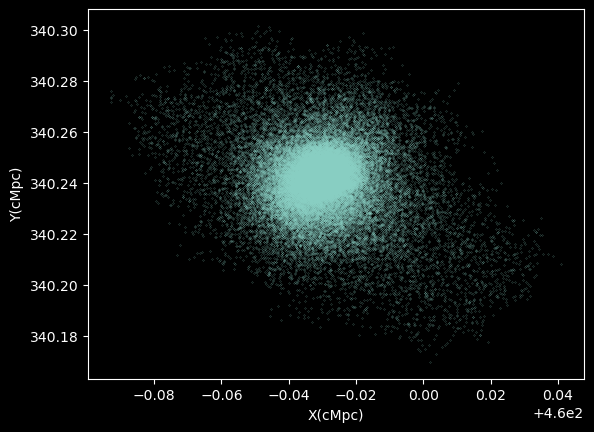

In [8]:
import matplotlib.pyplot as plt 

fig,ax = plt.subplots(1,1)
ax.set_xlabel(r'X(cMpc)')
ax.set_ylabel(r'Y(cMpc)')
ax.scatter(stardf['x'] ,stardf['y'],s=0.02)
#ax.set_xlim()
#ax.set_ylim()

Rescaling the position with respect to galaxy center

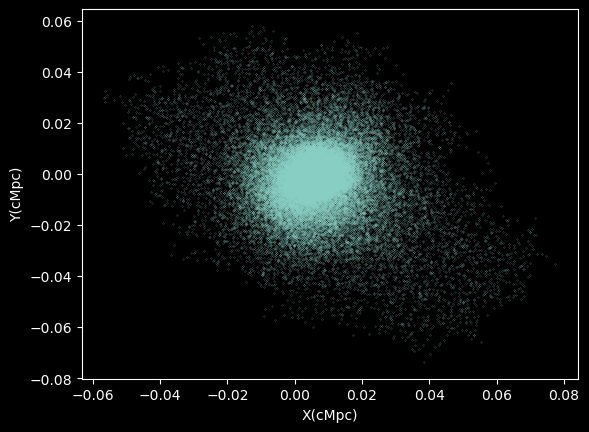

In [9]:
galxpos = galaxy.galtsub['pos'][0]
galypos = galaxy.galtsub['pos'][1]
galzpos = galaxy.galtsub['pos'][2]

fig,ax = plt.subplots(1,1)
ax.set_xlabel(r'X(cMpc)')
ax.set_ylabel(r'Y(cMpc)')
ax.scatter(stardf['x'] - galxpos,stardf['y']- galypos,s=0.02)


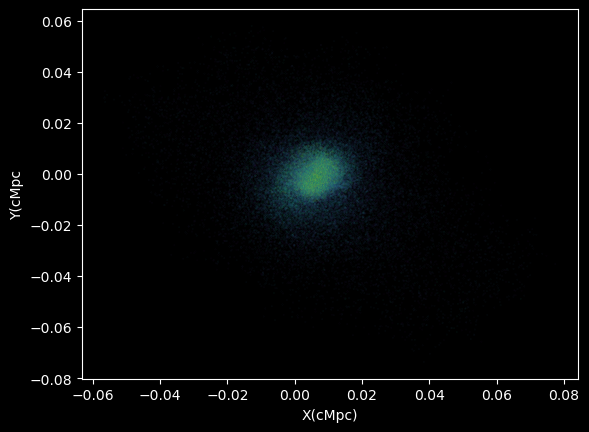

In [10]:

fig,ax = plt.subplots(1,1)
ax.set_xlabel(r'X(cMpc)')
ax.set_ylabel(r'Y(cMpc')
ax.scatter(stardf['x'] - galxpos, stardf['y']- galypos,c=galaxy.galstar.zp/0.02,s=0.02,alpha=0.2)


# histogram of stellar metallicity

<AxesSubplot:ylabel='Density'>

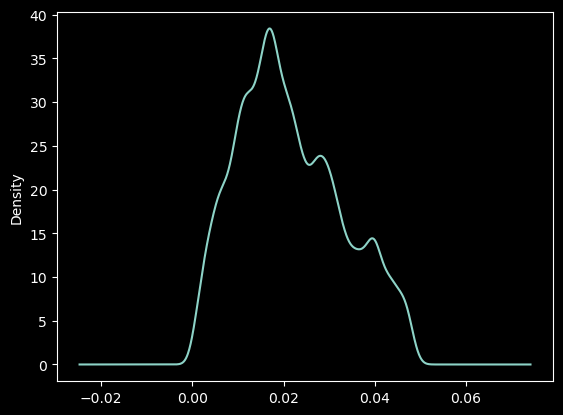

In [12]:
galaxy.galstar.zp.plot(kind='kde')

## YT project

In [13]:
import yt 

stardf = pd.DataFrame(galaxy.galstar.pos.to_list(), columns=['x', 'y','z'])
gasdf = pd.DataFrame(galaxy.galgas.pos.to_list(), columns=['x', 'y','z'])
dmdf = pd.DataFrame(galaxy.galdm.pos.to_list(), columns=['x', 'y','z'])

data_all = {
                        ("star","particle_position_x"): stardf['x']- galxpos,
                        ("star","particle_position_y"): stardf['y']- galypos,
                        ("star","particle_position_z"): stardf['z']- galzpos,
                        ("star","particle_mass"): galaxy.galstar.mass,
                        ("dm","particle_position_x"): dmdf['x']- galxpos,
                        ("dm","particle_position_y"): dmdf['y']- galypos,
                        ("dm","particle_position_z"): dmdf['z']- galzpos,
                        ("dm","particle_mass"): galaxy.galdm.mass,
                        ("gas","particle_position_x"):  gasdf['x']- galxpos,
                        ("gas","particle_position_y"):  gasdf['y']- galypos,
                        ("gas","particle_position_z"):  gasdf['z']- galzpos,
                        ("gas","particle_mass"): galaxy.galgas.mass
                    }
        
# get width that can encompass all particles
width=0.2
result = None
while result is None:
            try:
                # connect
                bbox = np.array([[-width,width], [-width, width], [-width, width]])

                ds_all = yt.load_particles(data_all, length_unit='Mpc', mass_unit='Msun', bbox=bbox)
                result = yt.ParticleProjectionPlot(ds_all,'x',("star","particle_mass"))
                
            except:
                width=width+0.1
                pass
        
ds = yt.load_particles(data_all, length_unit='Mpc', mass_unit='Msun', bbox=bbox)
        

yt : [INFO     ] 2022-12-13 20:14:16,961 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-12-13 20:14:16,964 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-12-13 20:14:16,967 Parameters: domain_left_edge          = [-0.2 -0.2 -0.2]
yt : [INFO     ] 2022-12-13 20:14:16,970 Parameters: domain_right_edge         = [0.2 0.2 0.2]
yt : [INFO     ] 2022-12-13 20:14:16,971 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-12-13 20:14:16,979 Allocating for 2.528e+05 particles
yt : [INFO     ] 2022-12-13 20:14:17,128 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-12-13 20:14:17,130 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-12-13 20:14:17,132 Parameters: domain_left_edge          = [-0.3 -0.3 -0.3]
yt : [INFO     ] 2022-12-13 20:14:17,133 Parameters: domain_right_edge         = [0.3 0.3 0.3]
yt : [INFO     ] 2022-12-13 20:14:17,134 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-12

yt : [INFO     ] 2022-12-13 20:15:29,381 xlim = -0.250000 0.250000
yt : [INFO     ] 2022-12-13 20:15:29,383 ylim = -0.250000 0.250000
yt : [INFO     ] 2022-12-13 20:15:29,384 xlim = -0.250000 0.250000
yt : [INFO     ] 2022-12-13 20:15:29,385 ylim = -0.250000 0.250000
yt : [INFO     ] 2022-12-13 20:15:29,390 Splatting (('star', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'



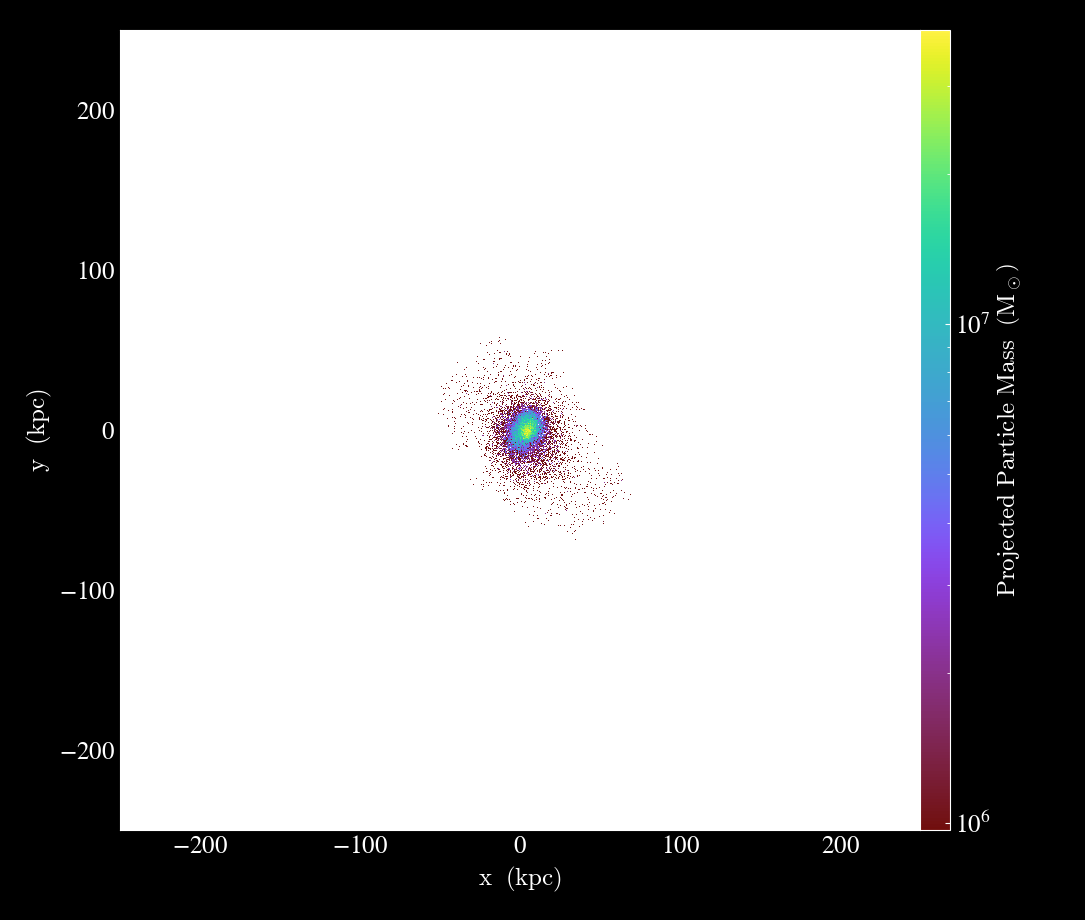

In [15]:
p = yt.ParticleProjectionPlot(ds,'z', [("star", "particle_mass")], width=(0.5, 0.5), depth=0.01)
p.set_unit(("star", "particle_mass"), "Msun")


## ICL 

### Get_Unbound(HostHaloID)

This function returns an object of class Unbound
The object has one dictionary attributes: icldict (same variables as tsub structure described above)
and four other attributes which are pandas dataframe namely: iclstar, iclgas, iclsink, icldm.
These dataframe contain the data for all the star, gas, sink and dark matter particles respectively.
same structure as described above for  galstar, galgas, galsink and galdm.


In [16]:
from HR5_mod import Get_Unbound


ICL = Get_Unbound(584230)



FOF found : 584230


In [20]:
import yt 
import pandas as pd 
import numpy as np 

fofxpos = ICL.icldict['pos'][0]
fofypos = ICL.icldict['pos'][1]
fofzpos = ICL.icldict['pos'][2]

stardf = pd.DataFrame(ICL.iclstar.pos.to_list(), columns=['x', 'y','z'])
gasdf = pd.DataFrame(ICL.iclgas.pos.to_list(), columns=['x', 'y','z'])
dmdf = pd.DataFrame(ICL.icldm.pos.to_list(), columns=['x', 'y','z'])

data_all = {
                        ("star","particle_position_x"): stardf['x']- fofxpos,
                        ("star","particle_position_y"): stardf['y']- fofypos,
                        ("star","particle_position_z"): stardf['z']- fofzpos,
                        ("star","particle_mass"): ICL.iclstar.mass,
                        ("dm","particle_position_x"): dmdf['x']- fofxpos,
                        ("dm","particle_position_y"): dmdf['y']- fofypos,
                        ("dm","particle_position_z"): dmdf['z']- fofzpos,
                        ("dm","particle_mass"): ICL.icldm.mass,
                        ("gas","particle_position_x"):  gasdf['x']- fofxpos,
                        ("gas","particle_position_y"):  gasdf['y']- fofypos,
                        ("gas","particle_position_z"):  gasdf['z']- fofzpos,
                        ("gas","particle_mass"): ICL.iclgas.mass
                    }

print("Mhere")
# get width that can encompass all particles
width=0.5
result = None
while result is None:
            try:

                # connect
                bbox = np.array([[-width,width], [-width, width], [-width, width]])

                ds_all = yt.load_particles(data_all, length_unit='Mpc', mass_unit='Msun', bbox=bbox)
                result = yt.ParticleProjectionPlot(ds_all,'x',("star","particle_mass"))
                
            except:
                width=width+0.5
                pass
        
ds = yt.load_particles(data_all, length_unit='Mpc', mass_unit='Msun', bbox=bbox)
        

yt : [INFO     ] 2022-12-13 20:19:13,251 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-12-13 20:19:13,254 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-12-13 20:19:13,255 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2022-12-13 20:19:13,257 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2022-12-13 20:19:13,257 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-12-13 20:19:13,261 Allocating for 2.453e+04 particles
yt : [INFO     ] 2022-12-13 20:19:13,335 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-12-13 20:19:13,336 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-12-13 20:19:13,337 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2022-12-13 20:19:13,339 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-12-13 20:19:13,339 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-12-13 20

Mhere


yt : [INFO     ] 2022-12-13 20:19:13,677 xlim = -1.000000 1.000000
yt : [INFO     ] 2022-12-13 20:19:13,678 ylim = -1.000000 1.000000
yt : [INFO     ] 2022-12-13 20:19:13,679 xlim = -1.000000 1.000000
yt : [INFO     ] 2022-12-13 20:19:13,679 ylim = -1.000000 1.000000
yt : [INFO     ] 2022-12-13 20:19:13,682 Splatting (('star', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'
yt : [INFO     ] 2022-12-13 20:19:13,938 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-12-13 20:19:13,940 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-12-13 20:19:13,942 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2022-12-13 20:19:13,943 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-12-13 20:19:13,944 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2022-12-13 20:18:08,969 xlim = -1.000000 1.000000
yt : [INFO     ] 2022-12-13 20:18:08,969 ylim = -1.000000 1.000000
yt : [INFO     ] 2022-12-13 20:18:08,970 xlim = -1.000000 1.000000
yt : [INFO     ] 2022-12-13 20:18:08,971 ylim = -1.000000 1.000000
yt : [INFO     ] 2022-12-13 20:18:08,974 Splatting (('star', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'



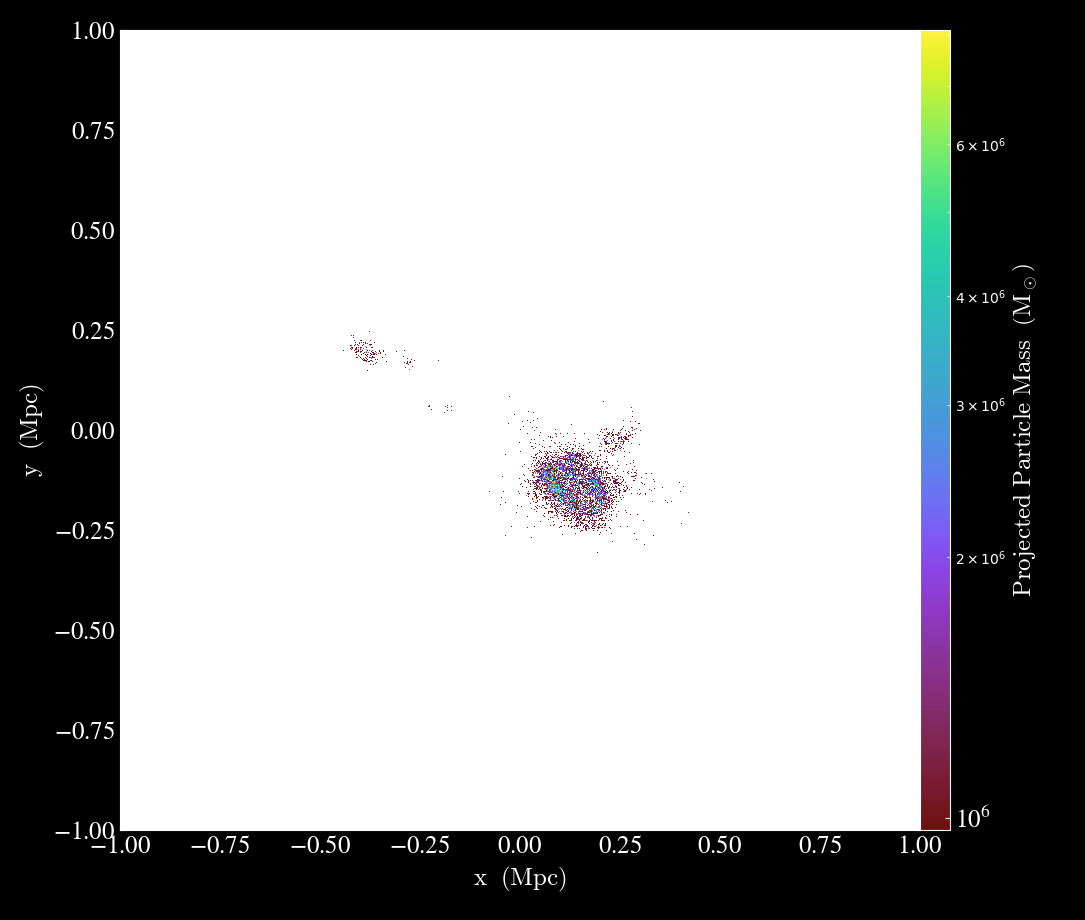

In [19]:
p = yt.ParticleProjectionPlot(ds, 2, [("star", "particle_mass")])
p.set_unit(("star", "particle_mass"), "Msun")
